# Homework 0 - Writeup

In [2]:
import numpy as np
from typing import *
import matplotlib.pyplot as plt
from importlib import reload
reload(plt)

# plt.style.use('dark_background')

<module 'matplotlib.pyplot' from '/home/trent/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

## 5 Isocontours of Normal Distributions (6 points)

In [3]:
def plot_contour(f: Callable, extent: Tuple[float], segments: Tuple[int]):
    x_low, x_high, y_low, y_high = extent
    x_segments, y_segments = segments
    x, y = np.meshgrid(np.linspace(x_low, x_high, x_segments),
                       np.linspace(y_low, y_high, y_segments))
    points = np.c_[x.ravel(), y.ravel()]
    Z = f(points).reshape(x.shape)
    
    return plt.contour(x, y, Z)
    

In [4]:
def gaussian_density(X, mu: np.ndarray, sigma: np.ndarray):
    """
    compute probability density in a batch manner
    X.shape = (count, dimension)
    """
    
    assert len(X.shape) == 2
    mu = mu.reshape(-1)
    det_sigma = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    
    res = np.empty(X.shape[0])
    for i, x in enumerate(X):
        res[i] = 1 / np.sqrt(np.power(2 * np.pi, X.shape[1]) * det_sigma) \
        * np.exp(-0.5 * (x - mu).reshape(1, -1) @ sigma_inv @ (x - mu).reshape(-1, 1))
        
    return res

In [5]:
dis_1 = lambda X: gaussian_density(X,
                                   np.array([1, 1]),
                                   np.array([[1, 0],
                                             [0, 2]]),)

dis_2 = lambda X: gaussian_density(X,
                                   np.array([-1, 2]),
                                   np.array([[2, 1],
                                             [1, 4]]),)

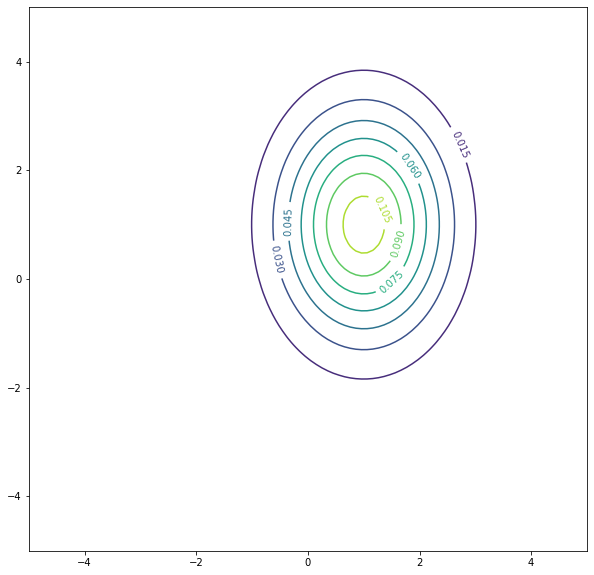

In [6]:
fig1 = plt.figure(figsize=(10, 10))
cs = plot_contour(dis_1, (-5, 5, -5, 5), (100, 100))
plt.clabel(cs)
plt.show()
fig1.savefig('fig1.png')

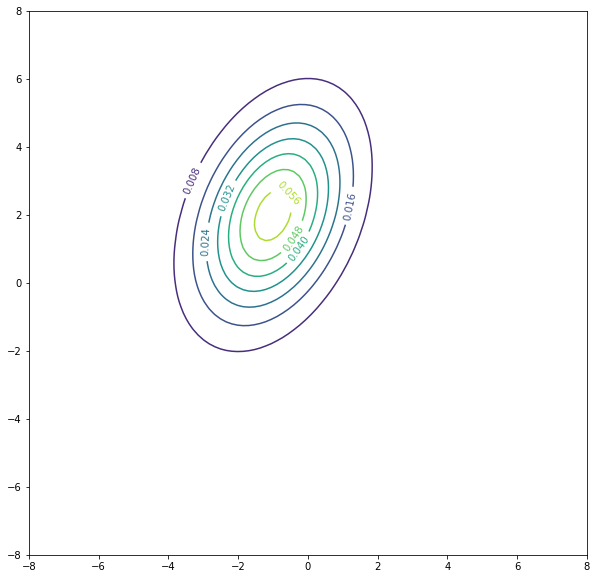

In [7]:
fig2 = plt.figure(figsize=(10, 10))
cs = plot_contour(dis_2, (-8, 8, -8, 8), (100, 100))
plt.clabel(cs)
plt.show()
fig2.savefig('fig2.png')

## 6 Hands-on with data (10 points)

### Problem a

In [8]:
datasets = [np.load('hw0_data/dataset_1.npy'), np.load('hw0_data/dataset_2.npy')]

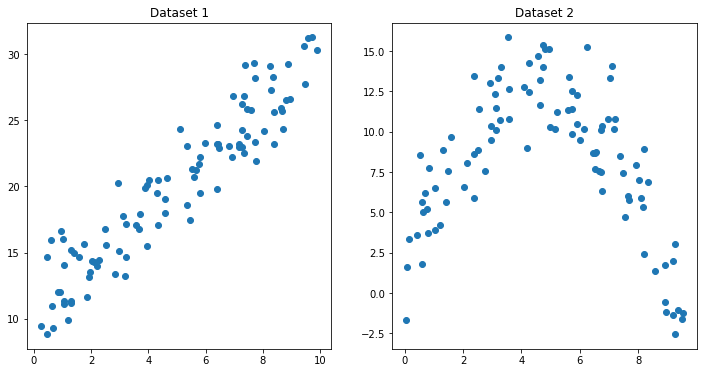

In [9]:
fig = plt.figure(figsize=(12, 6))

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.title(f'Dataset {i + 1}')
    plt.scatter(datasets[i][:, 0], datasets[i][:, 1], label='data points')

plt.show()

fig.savefig('6-a.png')

In [10]:
def mean(x: np.ndarray):
    assert len(x.shape) == 1

    return sum(x) / x.shape[0]

def var(x: np.ndarray):
    assert len(x.shape) == 1

    mean_x = mean(x)
    return mean((x - mean_x) ** 2)

def std(x: np.ndarray):
    assert len(x.shape) == 1

    return np.sqrt(var(x))

def covar(x: np.ndarray, y: np.ndarray):
    assert len(x.shape) == 1 and len(y.shape) == 1 and x.shape[0] == y.shape[0]
    mean_x, mean_y = mean(x), mean(y)

    return mean((x - mean_x) * (y - mean_y))

def correlation(x: np.array, y: np.array):
    assert len(x.shape) == 1 and len(y.shape) == 1 and x.shape[0] == y.shape[0]
    
    std_x, std_y = std(x), std(y)
    covar_xy = covar(x, y)
    
    return covar_xy / (std_x * std_y)

In [11]:
for i in range(2):
    print(f'dataset {i + 1}: {correlation(datasets[i][:, 0], datasets[i][:, 1])}')

dataset 1: 0.9390949620246671
dataset 2: -0.17930801518997472


In [12]:
def mean_squared_error(y_pred: np.ndarray, y_true: np.ndarray):
    assert len(y_pred.shape) == 1 and len(y_true.shape) == 1 \
        and y_pred.shape[0] == y_true.shape[0]
    
    return mean((y_pred - y_true) ** 2)

### Problem c

In [13]:
X, Y = datasets[0][:, 0].reshape(-1, 1), datasets[0][:, 1].reshape(-1, 1)
w = 1 / (X.T @ X)[0, 0] * (X.T @ Y)[0][0]

model_c = lambda x: w * x

print(w)

3.5414752100938673


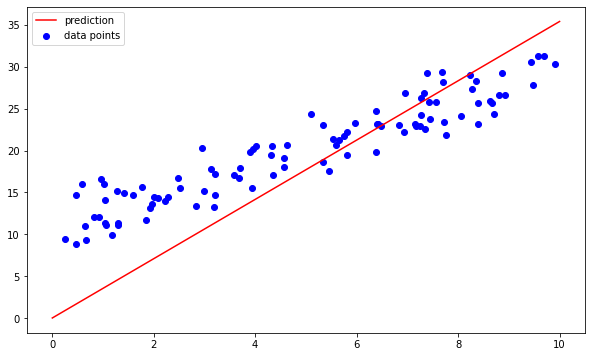

mse: 32.02742342241209


In [14]:
fig_c = plt.figure(figsize=(10, 6))
plt.scatter(X.ravel(), Y.ravel(), color='b', label='data points')
x_demo = np.linspace(0, 10, 100)
plt.plot(x_demo, model_c(x_demo), 'r-', label='prediction')
plt.legend()
plt.show()

fig_c.savefig('6-c.png')

print(f'mse: {mean_squared_error(model_c(X.reshape(-1)), Y.reshape(-1))}')

### Problem d

In [15]:
X_d = np.c_[X, np.ones(X.shape[0])]

In [16]:
w_d = np.linalg.inv(X_d.T @ X_d) @ X_d.T @ Y

model_d = lambda X: (np.c_[X, np.ones(X.shape[0])] @ w_d).reshape(-1)

print(w_d)

[[ 1.92923535]
 [10.55413516]]


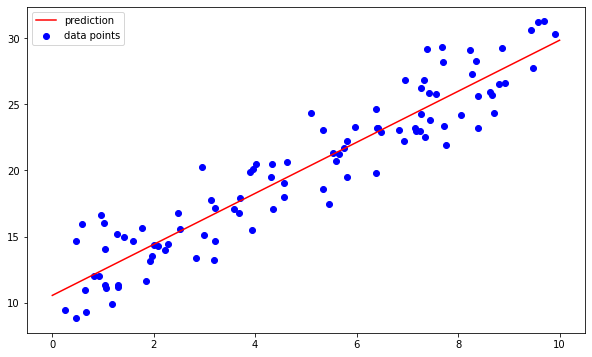

mse: 4.020171536079682


In [17]:
fig_d = plt.figure(figsize=(10, 6))
plt.scatter(X.ravel(), Y.ravel(), color='b', label='data points')
x_demo = np.linspace(0, 10, 100)
plt.plot(x_demo, model_d(x_demo), 'r-', label='prediction')
plt.legend()
plt.show()

fig_d.savefig('6-d.png')

print(f'mse: {mean_squared_error(model_d(X.reshape(-1)), Y.reshape(-1))}')

### Problem e

In [18]:
X_e = np.c_[X ** 2, X, np.ones(X.shape[0])]

In [19]:
w_e = np.linalg.inv(X_e.T @ X_e) @ X_e.T @ Y

model_e = lambda X: (np.c_[X ** 2, X, np.ones(X.shape[0])] @ w_e).reshape(-1)

print(w_e)

[[ 0.01560721]
 [ 1.77777908]
 [10.79565856]]


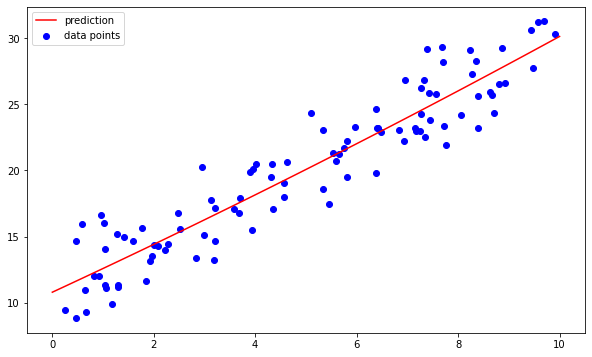

mse: 4.0093927596092325


In [20]:
fig_e = plt.figure(figsize=(10, 6))
plt.scatter(X.ravel(), Y.ravel(), color='b', label='data points')
x_demo = np.linspace(0, 10, 100)
plt.plot(x_demo, model_e(x_demo), 'r-', label='prediction')
plt.legend()
plt.show()

fig_e.savefig('6-e.png')

print(f'mse: {mean_squared_error(model_e(X.reshape(-1)), Y.reshape(-1))}')

### Problem f

In [21]:
def train_linear_model(X, Y, transformers: List[Callable] = [lambda x: x]):
    preprocessor = lambda X: np.concatenate([transformer(X) for transformer in transformers], axis=1)
    transformed_X = preprocessor(X)
    weights = np.linalg.inv(transformed_X.T @ transformed_X) @ transformed_X.T @ Y
    
    return lambda X: (preprocessor(X) @ weights).reshape(-1), weights

In [22]:
transform_confs = [[lambda X: X],
                   [lambda X: X, lambda X: np.ones(shape=X.shape)],
                   [lambda X: X ** 2, lambda X: X, lambda X: np.ones(shape=X.shape)]]

models_f = []
weights_f = []

for i, preprocessor in enumerate(transform_confs):
    new_model, new_weights = train_linear_model(datasets[1][:, 0].reshape(-1, 1),
                                                datasets[1][:, 1].reshape(-1, 1),
                                                preprocessor)
    
    models_f.append(new_model)
    weights_f.append(new_weights)

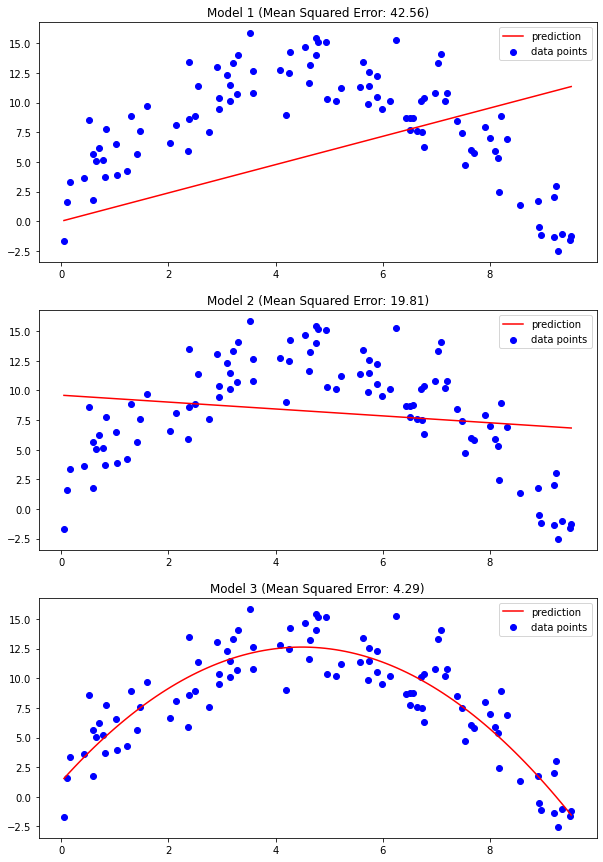

In [23]:
fig_f = plt.figure(figsize=(10, 15))

X_new, Y_new = datasets[1][:, 0].reshape(-1, 1), datasets[1][:, 1].reshape(-1, 1)

for i, model in enumerate(models_f):
    plt.subplot(3, 1, i + 1)
    plt.scatter(datasets[1][:, 0], datasets[1][:, 1], color='b', label='data points')
    X_demo = np.linspace(X_new.min(), X_new.max(), 100).reshape(-1, 1)
    plt.plot(X_demo.reshape(-1), model(X_demo), 'r-', label='prediction')
    plt.legend()
    plt.title(f'Model {i + 1} (Mean Squared Error: {mean_squared_error(model(X_new), Y_new.reshape(-1)):.2f})')

plt.show()
fig_f.savefig('6-f.png')
    

In [24]:
weights_f

[array([[1.19329638]]),
 array([[-0.29082791],
        [ 9.60040423]]),
 array([[-0.56121496],
        [ 5.04461079],
        [ 1.29308851]])]

### Problem g

In [105]:
def cross_validation(trainer: Callable, X: np.ndarray, Y: np.ndarray, n_folds: int = 4, loss: Callable = mean_squared_error):
    assert len(X.shape) == 2 and len(Y.shape) == 2 and X.shape[0] == Y.shape[0]
    
    shuffled = np.c_[X, Y]
    np.random.shuffle(shuffled)
    separated_datasets = []
    pace = X.shape[0] // n_folds
    for i in range(n_folds):
        current_part = shuffled[i * pace : (i + 1) * pace, :]
        X, Y = current_part[:, :-1], current_part[:, [-1]]
        separated_datasets.append((X, Y))
    
    train_losses = []
    val_losses = []
    
    for i in range(n_folds):
        X_train = np.concatenate([part[0] for j, part in enumerate(separated_datasets) if j != i], axis=0)
        Y_train = np.concatenate([part[1] for j, part in enumerate(separated_datasets) if j != i], axis=0)
        X_val, Y_val = separated_datasets[i]

        model, weights = trainer(X_train, Y_train)
        train_losses.append(loss(model(X_train), Y_train.reshape(-1)))
        val_losses.append(loss(model(X_val), Y_val.reshape(-1)))
    
    return sum(train_losses) / n_folds, sum(val_losses) / n_folds
        

In [106]:
# I tried everythiing, but the auto generator doesn't work. I don't know why, could be a bug in Python
# preprocessor_configurations = []

# for i in range(5):
#     def preprocessor(X):
#         return np.concatenate(list(reversed([X ** (j + 1) for j in range(i + 1)]))
#                               + [np.ones(shape=X.shape)], axis=1)
        
#     preprocessor_configurations.append(preprocessor)

# The dumb way of generating configurations
preprocessor_configurations = list(reversed([
    [lambda x: x ** 5, lambda x: x ** 4, lambda x: x ** 3, lambda x: x ** 2, lambda x: x ** 1, lambda x: np.ones(x.shape)],
    [lambda x: x ** 4, lambda x: x ** 3, lambda x: x ** 2, lambda x: x ** 1, lambda x: np.ones(x.shape)],
    [lambda x: x ** 3, lambda x: x ** 2, lambda x: x ** 1, lambda x: np.ones(x.shape)],
    [lambda x: x ** 2, lambda x: x ** 1, lambda x: np.ones(x.shape)],
    [lambda x: x ** 1, lambda x: np.ones(x.shape)]
]))

In [135]:
cross_validation_results = {}
for i, conf in enumerate(preprocessor_configurations):
    cross_validation_results[i] = cross_validation(lambda X, Y: train_linear_model(X, Y, conf), datasets[1][:, [0]], datasets[1][:, [1]], 4, mean_squared_error)

In [136]:
cross_validation_results

{0: (19.672481096161913, 20.735330715925684),
 1: (4.194597148348902, 4.919204181134608),
 2: (4.23274744110109, 4.526595149960991),
 3: (4.187943600912675, 4.851894365343858),
 4: (4.157373616431769, 5.207100269786207)}

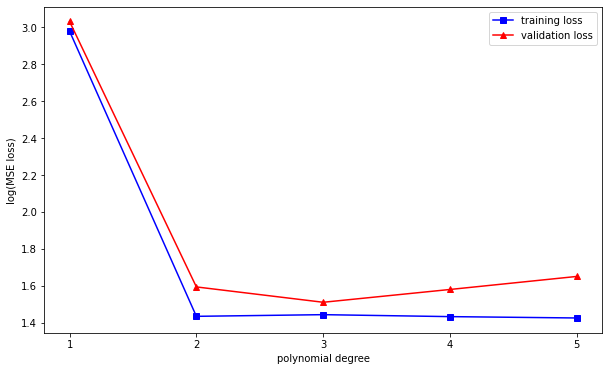

In [141]:
fig_g = plt.figure(figsize=(10, 6))
results = sorted(cross_validation_results.items(), key=lambda x: x[0])
train_losses, val_losses = [item[1][0] for item in results], [item[1][1] for item in results]
plt.plot(np.arange(len(results)) + 1, np.log(np.array(train_losses)), 'b-s', label='training loss')
plt.plot(np.arange(len(results)) + 1, np.log(np.array(val_losses)), 'r-^', label='validation loss')
# plt.plot(np.arange(len(results)) + 1, np.array(train_losses), 'b-s', label='training loss')
# plt.plot(np.arange(len(results)) + 1, np.array(val_losses), 'r-^', label='validation loss')
plt.xlabel('polynomial degree')
plt.ylabel('log(MSE loss)')
plt.xticks(np.arange(len(results), dtype=int) + 1)
plt.legend()
plt.show()
fig_g.savefig('6-g.png')

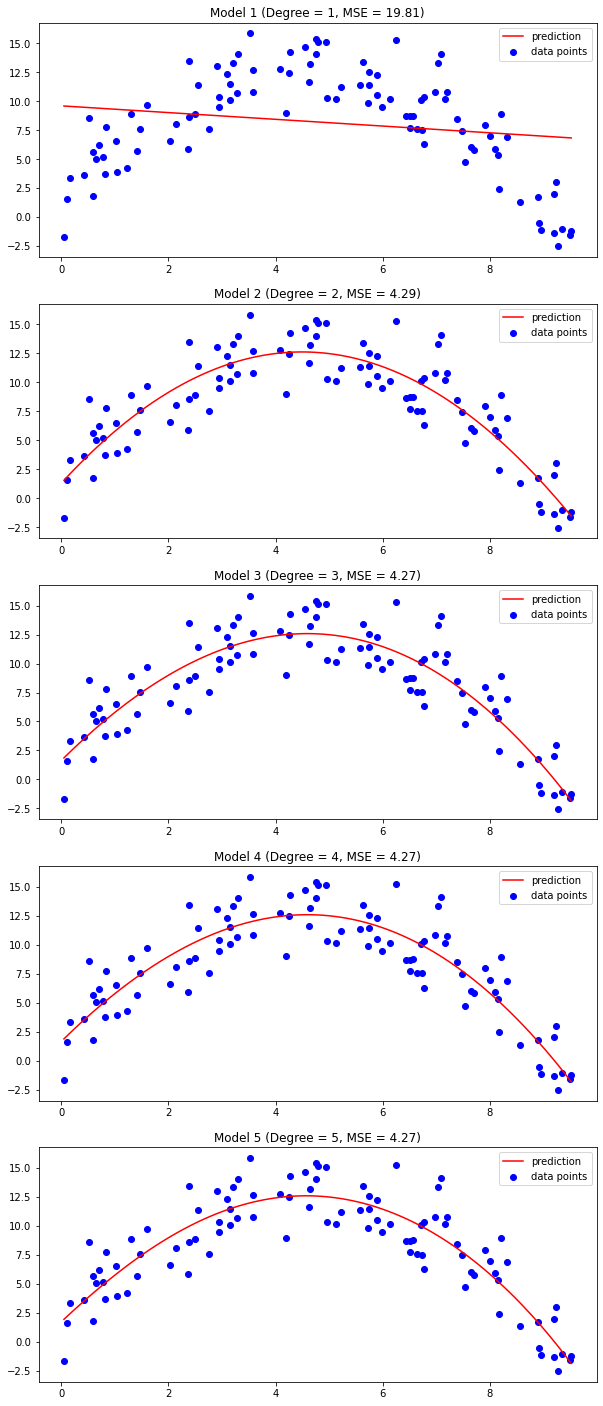

In [142]:
fig_g_model_vis = plt.figure(figsize=(10, 25))
X, Y = datasets[1][:, 0].reshape(-1, 1), datasets[1][:, 1].reshape(-1, 1)
for i, conf in enumerate(preprocessor_configurations):
    plt.subplot(5, 1, i + 1)
    plt.scatter(X.ravel(), Y.ravel(), color='b', label='data points')
    model, weights= train_linear_model(X, Y, conf)
    X_demo = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    plt.plot(X_demo, model(X_demo), 'r-', label='prediction')
    plt.legend()
    plt.title(f'Model {i + 1} (Degree = {len(conf) - 1}, MSE = {mean_squared_error(model(X), Y.ravel()):.2f})')

plt.show()

fig_g_model_vis.savefig('6-g-model_visualization.png')